In [23]:
import numpy as np
from glob import glob
from tensorflow.keras.models import load_model
from ztfrapid import ztf_rapid
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
files = np.load('/home/miranda/ztf-rapid/data/processed/test_over_001.npz')
model_filepaths = glob('/home/miranda/ztf-rapid/models/test_over_100/test_over/test_*.hdf5')

In [3]:
models = [load_model(path) for path in model_filepaths]

In [4]:
y_pred_list = [ztf_rapid.predict(model, files['X_test']) for model in models]

In [7]:
res = ztf_rapid.runs_result_dataframe(files['y_test'], y_pred_list, files['objids_test'])
res

,class,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,...,model_91,model_92,model_93,model_94,model_95,model_96,model_97,model_98,model_99,model_100
objid,,,,,,,,,,,,,,,,,,,,,
1_ZTF19abyigib,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1_ZTF20aabqkla,4,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1_ZTF19abdkgns,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1_ZTF19aacijie,4,3,3,4,4,3,2,4,3,3,...,4,4,4,1,4,4,4,1,4,3
3_ZTF18acdwmsx,1,4,1,4,4,4,1,1,1,1,...,1,1,1,1,4,1,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_ZTF19abrogbl,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1_ZTF19abvhkst,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1_ZTF19aanirdx,4,4,4,4,4,3,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [8]:
ztf_rapid.result_class_distribution(res, files['class_names'])

,AGN,CV,SN II,SN Ia
objid,,,,
1_ZTF19abyigib,0.01,0.00,0.01,0.98
1_ZTF20aabqkla,0.93,0.06,0.01,0.00
1_ZTF19abdkgns,0.00,0.00,0.00,1.00
1_ZTF19aacijie,0.06,0.15,0.27,0.52
3_ZTF18acdwmsx,0.74,0.00,0.01,0.25
...,...,...,...,...
1_ZTF19abrogbl,0.00,0.00,0.00,1.00
1_ZTF19abvhkst,0.00,0.00,0.00,1.00
1_ZTF19aanirdx,0.00,0.00,0.02,0.98


Classifying 56.44% of the evaluation set.


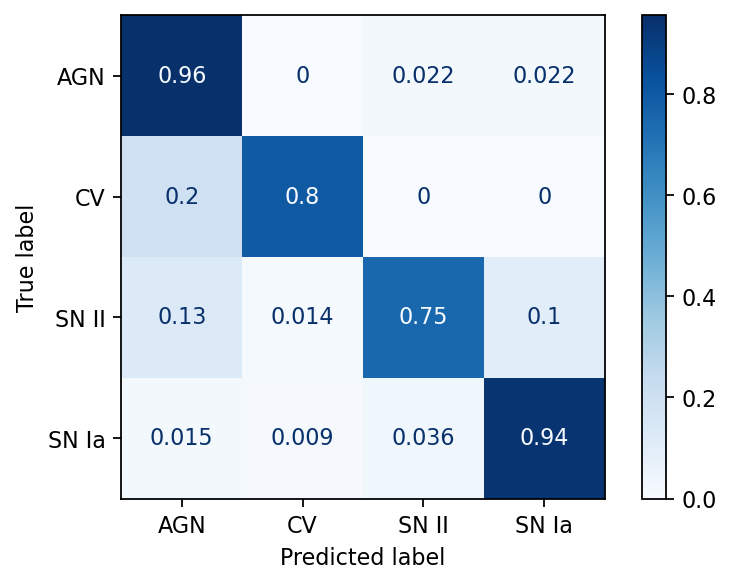

In [9]:
y_true, y_pred = ztf_rapid.true_pred_ensemble(
    files['y_test'], 
    y_pred_list, 
    files['objids_test'], 
    files['class_names'],
    cutoff=0.9)
ztf_rapid.plot_confusion_matrix(y_true, y_pred, files['class_names'])
print("Classifying {:.2%} of the evaluation set.".format(len(y_true) / len(files['objids_test'])))

In [11]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.96      0.83        90
           2       0.67      0.80      0.73        20
           3       0.80      0.75      0.78       138
           4       0.97      0.94      0.96       664

    accuracy                           0.91       912
   macro avg       0.79      0.86      0.82       912
weighted avg       0.92      0.91      0.91       912

